In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\chand\Downloads\car_age_price.csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
# Checking null values
data.isna().sum()

Year     0
Price    0
dtype: int64

In [34]:

data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


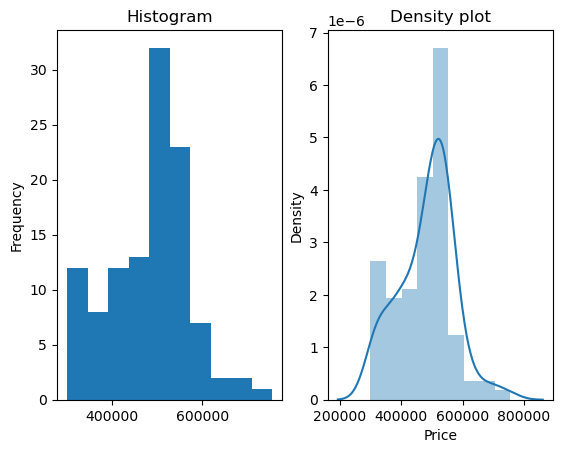

In [5]:
# Plotting the dataset to understand shape of the curve
plt.subplot(1,2,1)
data['Price'].plot(kind='hist')
plt.title("Histogram")
plt.subplot(1,2,2)
sns.distplot(data["Price"])
plt.title("Density plot")
plt.show()

In [6]:
#sorting values with respect to year
df =data.sort_values(by=['Year'])


In [7]:
# removing duplicates
df=df.drop_duplicates()
df.head()


,Year,Price
53,2013,345000
50,2013,325000
73,2013,320000
81,2014,390000
56,2014,341000


In [8]:
df.shape

(58, 2)

In [9]:
df.describe()

,Year,Price
count,58.000000,58.000000
mean,2016.568966,474448.224138
std,1.902096,105995.736551
min,2013.000000,300000.000000
25%,2015.000000,397000.000000
50%,2017.000000,475000.000000
75%,2018.000000,543750.000000
max,2020.000000,755000.000000


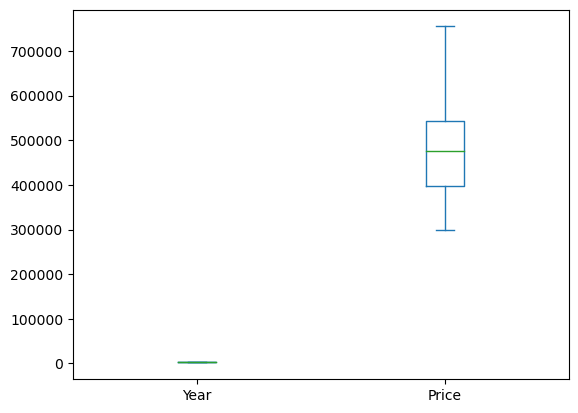

In [10]:
# checking outliers
df.plot(kind='box')
plt.show()

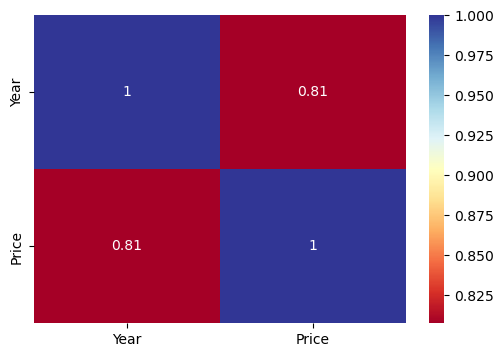

In [11]:
# Finding correlation coefficient
corr_matrix = df.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='RdYlBu')
plt.show()

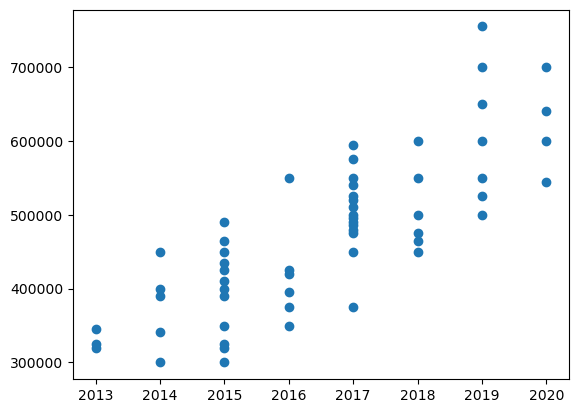

In [12]:
# plotting scatter plot of the data
plt.scatter(df['Year'],df['Price'])
plt.show()

# Regression analysis

In [44]:
# Assigning values to independent and dependent variables
x= df.drop(['Price'], axis = 1)
y=df["Price"]


In [45]:
# Importing Packages to perform Regression Analysis
from sklearn.model_selection import train_test_split

# Spliting the data into train data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.2)



# 1- Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
# Fitting the Linear regression model using training data
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [48]:
lr.coef_ ,lr.intercept_

(array([44925.10098793]), -90119759.15751922)

<function matplotlib.pyplot.show(close=None, block=None)>

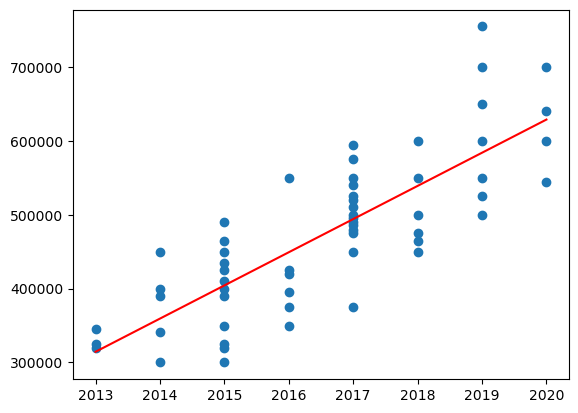

In [49]:
# Equation of the regression line
line=lr.coef_*x + lr.intercept_ 

# ploting the regression line
plt.scatter(x,y) 
plt.plot(x,line,c='red')
plt.show()

In [50]:
# Finding Meansquare Erorr and r2 of the linear model

from sklearn.metrics import mean_squared_error,r2_score
print("MeanSquareError :",mean_squared_error(y_test,predictions))
print('R Squared Value : ',r2_score(y_test,predictions))

MeanSquareError : 4542614235.480889
R Squared Value :  0.6325643791497111


In [51]:
# predicting first 10 values using linear model
predictions[0:10]

array([314469.13117453, 359394.23216246, 494169.53512624, 404319.33315039,
       539094.63611417, 584019.73710208, 494169.53512624, 449244.43413831,
       539094.63611417, 404319.33315039])

# Predicting the price in 2022 using the model

In [52]:
lr.predict([[2022]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([718795.04006585])

In [55]:
print("The predicted price of car in 2022 will be : ",lr.predict([[2022]]))

The predicted price of car in 2022 will be :  [718795.04006585]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2- Lasso Regression

In [56]:
# Importing Packages to perform Lasso Regression Analysis
from sklearn.linear_model import Lasso

In [57]:
# Fitting the Lasso regression model using training data
model=Lasso(alpha=1.0)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [61]:
model.coef_ ,model.intercept_

(array([44924.81064764]), -90119173.64215146)

In [58]:
# predicting first 10 values using linear model
prediction[0:10]

array([314470.19154775, 359395.00219539, 494169.43413831, 404319.81284304,
       539094.24478595, 584019.0554336 , 494169.43413831, 449244.62349068,
       539094.24478595, 404319.81284304])

In [59]:
# Finding Meansquare Erorr and r2 of the Lasso regression model
from sklearn.metrics import mean_squared_error,r2_score
print("MeanSquareError :",mean_squared_error(y_test,prediction))
print('R Squared Value : ',r2_score(y_test,prediction))

MeanSquareError : 4542614927.434173
R Squared Value :  0.632564323180115


# Predicting the price of car in 2022 using Lasso Regression model

In [64]:
pred=model.predict([[2022]])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [65]:
print("The predicted price of car in 2022 will be : ",pred)

The predicted price of car in 2022 will be :  [718793.48737651]
